In [1]:
import math
import numpy as np
import sys
import time
sys.path.append('../')

from CustomBackground import CustomBackground_DiskBB
from CustomInstrument import CustomInstrument
from helper_functions import get_T_in_log10_Kelvin

import matplotlib.pyplot as plt

/=============================================\
| X-PSI: X-ray Pulse Simulation and Inference |
|---------------------------------------------|
|                Version: 2.0.0               |
|---------------------------------------------|
|      https://xpsi-group.github.io/xpsi      |
\=============================================/

Imported GetDist version: 1.4
Imported nestcheck version: 0.2.1


In [2]:
background = CustomBackground_DiskBB(bounds=(None, None), values={}, interstellar = None)

diskbb_T_keV = 0.25 # 0.3  #  keV #0.3 keV for Kajava+ 2011
background['T_in'] = get_T_in_log10_Kelvin(diskbb_T_keV)

r_in = 30 # 20 #  1 #  km #  for very small diskBB background
distance = 3.5
inclination = 60
cos_i = math.cos(inclination*math.pi/180)
background['K_disk'] = cos_i*(r_in/(distance/10))**2  # (km / 10 kpc)^2


Creating parameter:
    > Named "T_in" with bounds [3.000e+00, 1.000e+01].
    > Temperature at inner disk radius in log10 Kelvin.
Creating parameter:
    > Named "K_disk" with bounds [0.000e+00, 1.000e+08].
    > Disk normalisation cos_i*R_in^2/D^2 in (km / 10 kpc)^2.


In [3]:
this_directory = '..'
ARF_file=this_directory + '/../model_data/instrument_data/J1808_NICER_2019/merged_saxj1808_2019_arf_aeff.txt'
RMF_file=this_directory + '/../model_data/instrument_data/J1808_NICER_2019/merged_saxj1808_2019_rmf_matrix.txt'
channel_edges_file=this_directory + '/../model_data/instrument_data/J1808_NICER_2019/merged_saxj1808_2019_rmf_energymap.txt'

exposure_time = 1.32366e5 #Mason's 2019 data cut
channel_low = 20
channel_hi = 300
max_input = 1400
phases_space = np.linspace(0.0, 1.0, 33)

NICER = CustomInstrument.from_response_files(ARF = ARF_file,
        RMF = RMF_file,
        channel_edges = channel_edges_file,       
        channel_low=channel_low,
        channel_hi=channel_hi,
        max_input=max_input)


Setting channels for loaded instrument response (sub)matrix...
Channels set.
No parameters supplied... empty subspace created.


In [4]:
repeats = 10
time_start = time.time()
for repeat in range(repeats):
    background(phases_space, NICER.energy_edges)
time_end = time.time()

print((time_end-time_start)/10)

0.008472490310668945


In [5]:
bkg_slow = background.incident_background[:,0]

In [6]:
# background.alternative_call(phases_space, NICER.energy_edges)

In [7]:
# bkg_fast = background.incident_background[:,0]

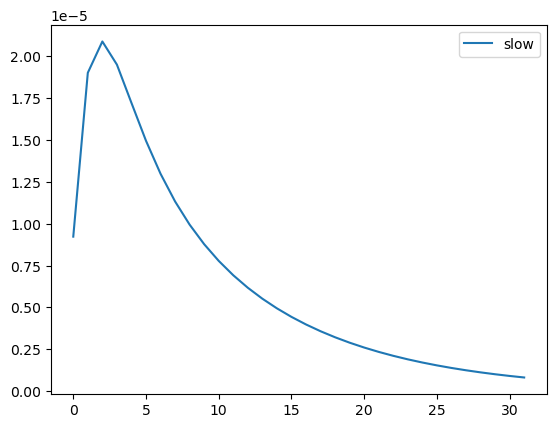

In [8]:
fig, ax = plt.subplots()

ax.plot(bkg_slow, label='slow')
# ax.plot(bkg_fast, label='fast')
ax.legend()

# flux per energy

In [9]:
E = 0.03125
T = 0.1
T_in = 0.25000000000000017
T_out =  0.02500000000000002
epsrel = 1e-4

background.diskbb_flux(E, T_in, T_out, background.b_E, epsrel)

4.427714319465231e+30

In [10]:
from xpsi.tools.background_integrator import disk_f_E
disk_f_E(E, T_in, T_out, epsrel)

4.4277143220252686e+30

# disk integrand

In [11]:
background.diskbb_integrand(T, E, T_in, background.b_E)

9.641638544308662e+30

In [12]:
from xpsi.tools.background_integrator import disk_integrand
disk_integrand(T, E, T_in)

9.641638544308662e+30

# b_E

In [13]:
from xpsi.tools.background_integrator import b_E
b_E(T, E)

8.374858725603796e+28

In [14]:
background.b_E(E, T)

8.374858725603796e+28